# STRESS LEVEL PREDICTION IN AND THROUGH SLEEP


#  Import necessary libraries

In [53]:
import pandas as pd                                   # For data manipulation and analysis using DataFrames
import numpy as np                                    # For numerical operations
import matplotlib.pyplot as plt                       # For creating visualizations
import seaborn as sns                                 # For advanced visualizations and statistical graphics
from sklearn.model_selection import train_test_split    # For splitting data into training and testing sets
from sklearn.metrics import confusion_matrix            # Import the confusion_matrix function for evaluating classification results
from sklearn.metrics import accuracy_score,confusion_matrix    # Import the confusion_matrix function for evaluating classification results
from sklearn.metrics import classification_report,precision_score          # Import the classification_report function for detailed classification metrics
from sklearn.linear_model import LogisticRegression    # For Logistic Regression model
from sklearn.ensemble import RandomForestClassifier    # For Random Forest model
from sklearn.tree import DecisionTreeClassifier        # For Decision Tree model
from sklearn.svm import SVC                            # For Support Vector Machine (SVM) model
from sklearn.naive_bayes import GaussianNB            # For Gaussian Naive Bayes model
from sklearn.neighbors import KNeighborsClassifier # For k-Nearest Neighbors (k-NN) model
from sklearn.ensemble import BaggingClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier


# Importing  Dataset



###  About the dataset

In SayoPillow.csv, we can see the relationship between the parameters- snoring range of the user, respiration rate, body temperature, limb movement rate, blood oxygen levels, eye movement, number of hours of sleep, heart rate and Stress Levels (0- low/normal, 1 – medium low, 2- medium, 3-medium high, 4 -high

In [54]:
## Reading the CSV file 'SaYoPillow.csv' and storing the data in a DataFrame called 'data'

data=pd.read_csv("C:\\Users\\USER\\Downloads\\SaYoPillow.csv")
data.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


.


### Column Descriptions:

'sr' or 'snoring_rate': The rate or intensity of snoring during sleep, which could be measured in some unit or scale.

'rr' or 'respiration_rate': The number of breaths taken per minute during sleep.
't' or 'body_temperature': The body temperature of the user during sleep, possibly measured in degrees Celsius or Fahrenheit.

'lm' or 'limb_movement': The rate or intensity of limb movement during sleep, indicating how active or restless the person is
.
'bo' or 'blood_oxygen': The blood oxygen level, which represents the amount of oxygen present in the blood during sleep.

'rem' or 'eye_movement': The eye movement activity during sleep, which might indicate the Rapid Eye Movement (REM) phase of sleep.

'sr.1' or 'sleeping_hours': The number of hours slept during a particular sleep session.

'hr' or 'heart_rate': The number of heartbeats per minute during sleep, an essential physiological parameter related to overall health and sleep quality.

'sl' or 'stress_level': The target variable representing the stress level during sleep, categorized into

.

In [55]:
# Renaming the columns of the DataFrame for better readability and understanding

data.columns=['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement', 'blood_oxygen', \
             'eye_movement', 'sleeping_hours', 'heart_rate', 'stress_level']
data.head()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


# Analyzing Data

 Stress Levels :0- low/normal, 1 – medium low, 2- medium, 3-medium high, 4 -high

In [56]:
data['stress_level'].unique()

array([3, 1, 0, 2, 4], dtype=int64)

In [57]:
# Rows and Columns of our dataset

data.shape 

(630, 9)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   snoring_rate      630 non-null    float64
 1   respiration_rate  630 non-null    float64
 2   body_temperature  630 non-null    float64
 3   limb_movement     630 non-null    float64
 4   blood_oxygen      630 non-null    float64
 5   eye_movement      630 non-null    float64
 6   sleeping_hours    630 non-null    float64
 7   heart_rate        630 non-null    float64
 8   stress_level      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [59]:
# To show statistical summary of the columns of our data

data.describe()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


# Data Cleaning

In [60]:
#checking for null values in the dataframe

data.isnull().sum()

snoring_rate        0
respiration_rate    0
body_temperature    0
limb_movement       0
blood_oxygen        0
eye_movement        0
sleeping_hours      0
heart_rate          0
stress_level        0
dtype: int64

In [61]:
# check for duplicated values

data.duplicated().sum()

0

In [62]:
# To display number of samples on each class

data['stress_level'].value_counts()

3    126
1    126
0    126
2    126
4    126
Name: stress_level, dtype: int64

### Checking distribution of Target Variable

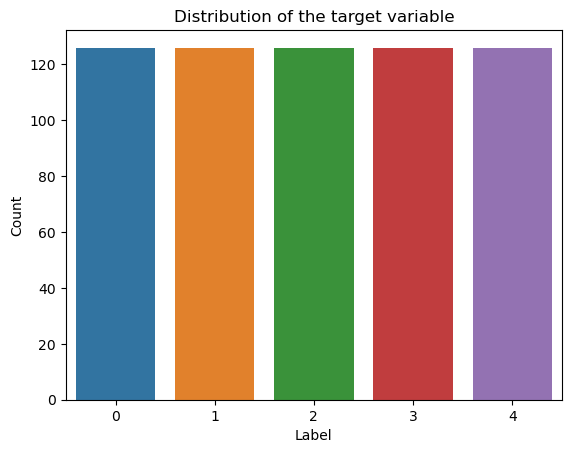

In [63]:
 #Creating a count plot to visualize the distribution of the target variable 'stress_level'
# using the countplot() function from the seaborn library
# The 'stress_level' column from the DataFrame 'data' is specified as the x-axis variable

sns.countplot(x='stress_level', data=data)

plt.xlabel('Label')

plt.ylabel('Count')

plt.title('Distribution of the target variable')

plt.show()


# Exploratory Data Analysis



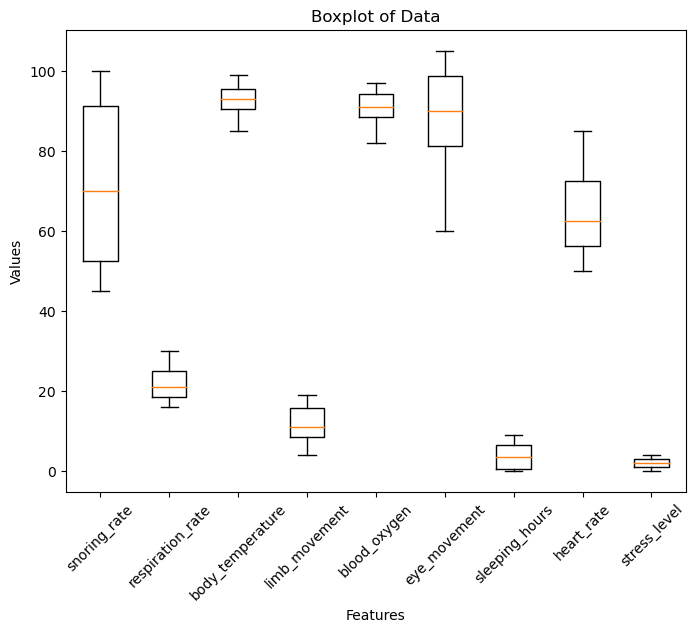

In [64]:
# plot to check for outliers

plt.figure(figsize=(8, 6))
plt.boxplot(data.values, labels=data.columns)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Boxplot of Data')
plt.xlabel('Features')
plt.ylabel('Values')

# Show the plot
plt.show()


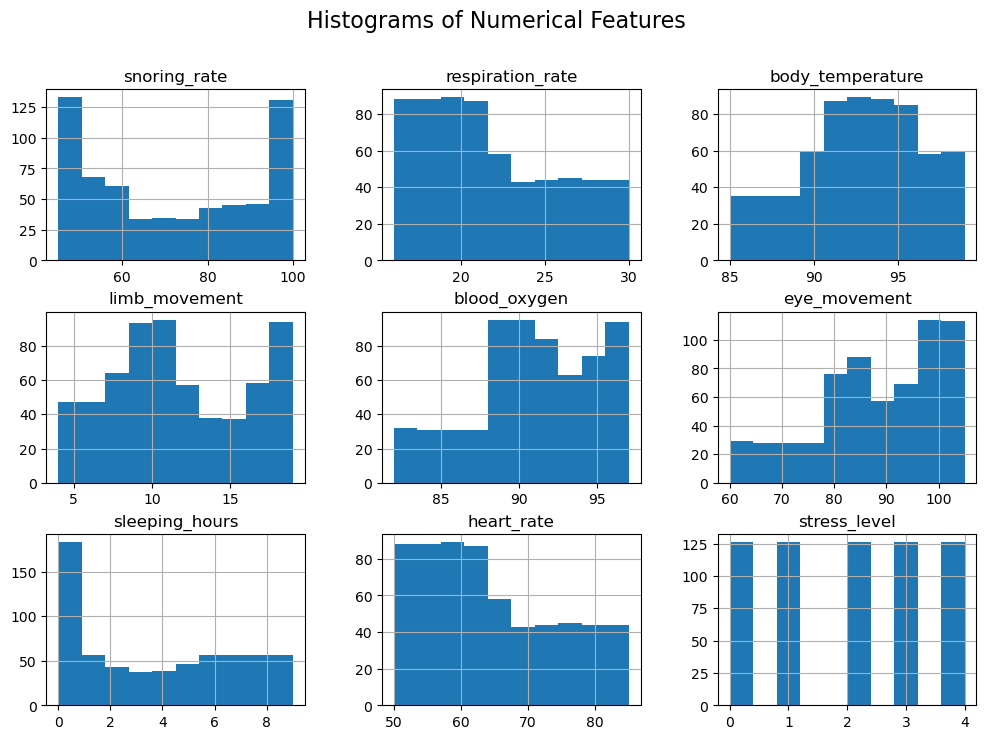

In [65]:
# Histograms for each numerical feature
data.hist(figsize=(12, 8))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()


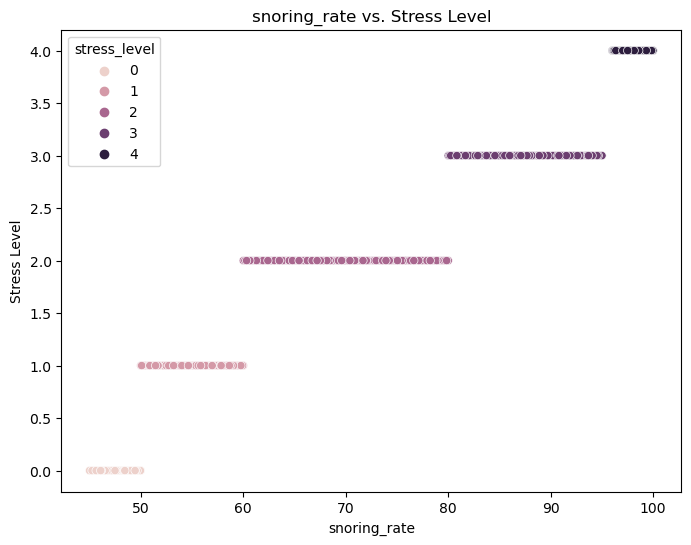

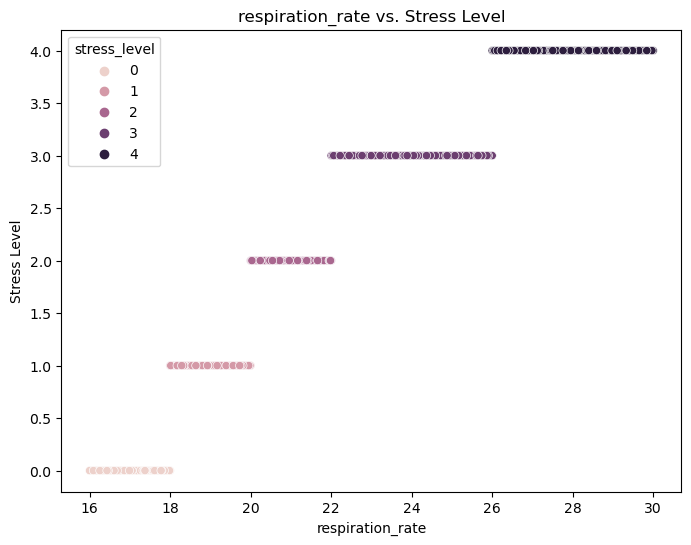

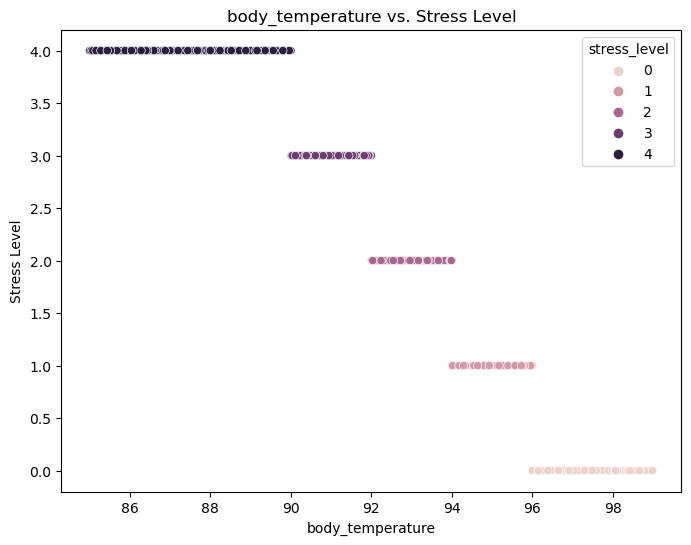

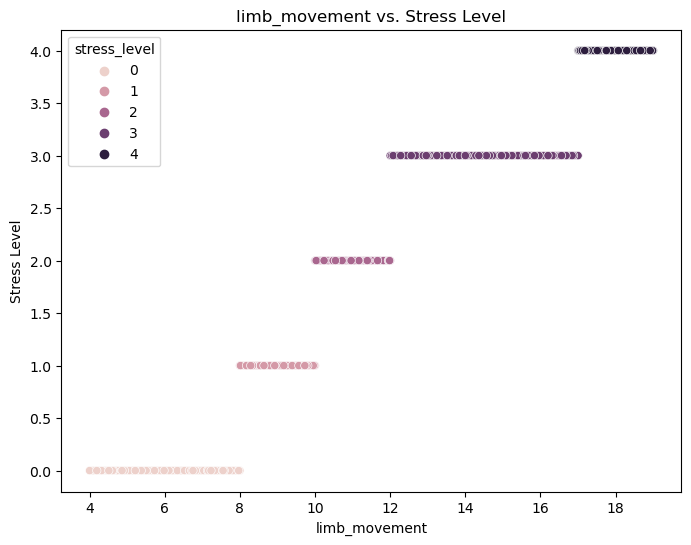

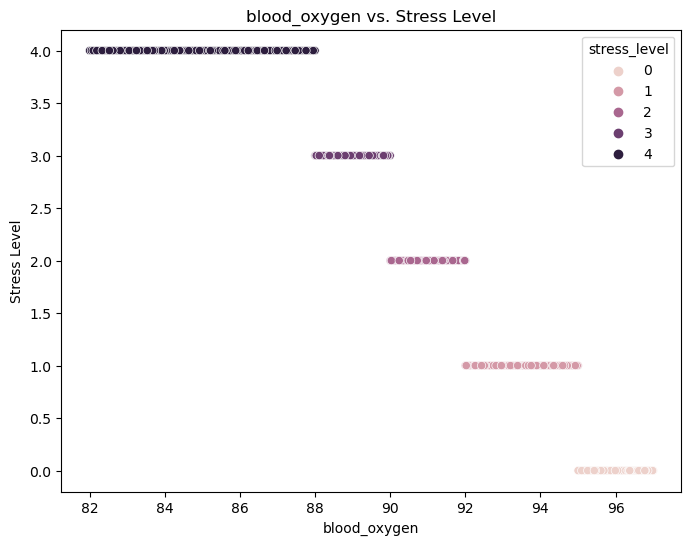

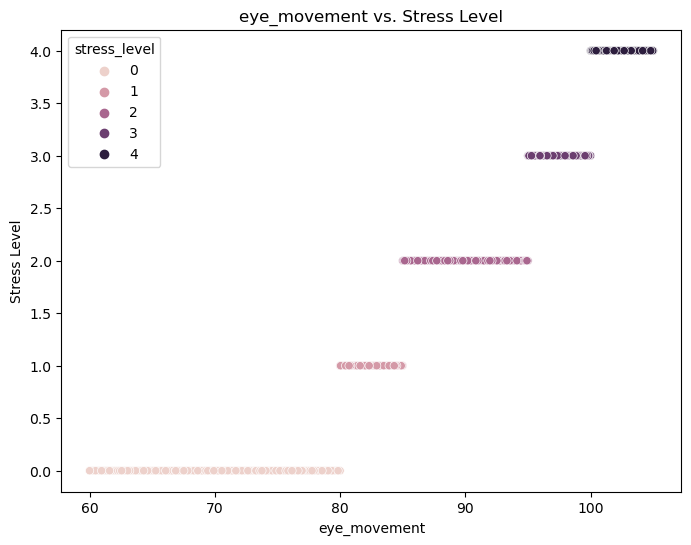

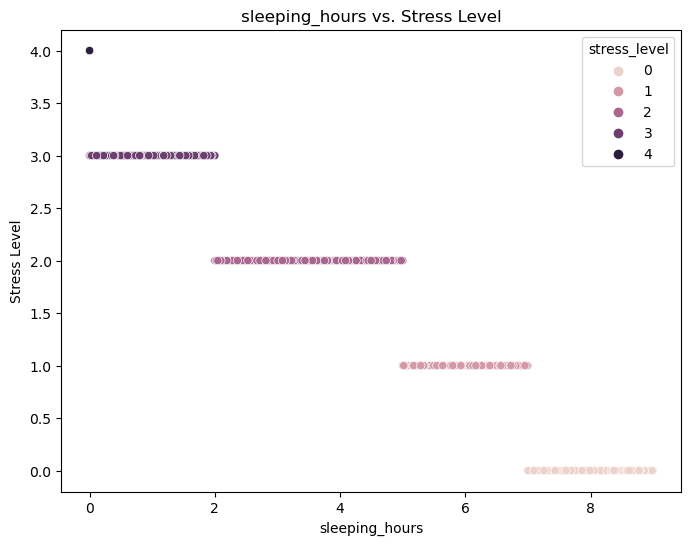

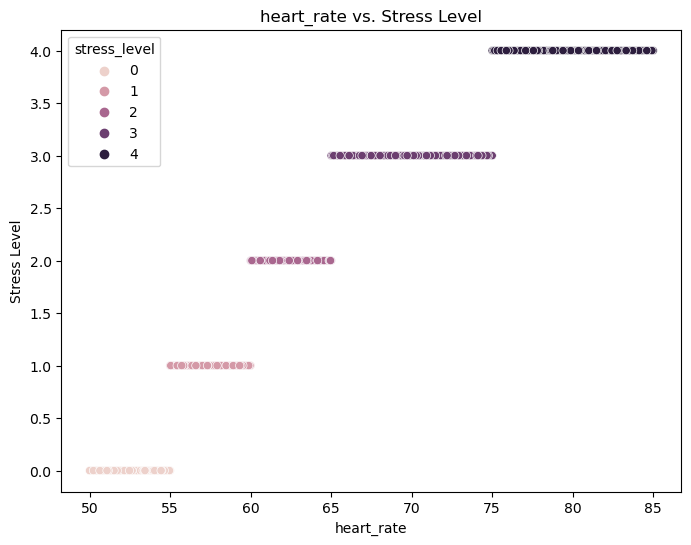

In [67]:
# Scatter plots for each numerical feature against 'stress_level'
for feature in data.columns[:-1]:  # Exclude the target variable 'stress_level'
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=feature, y='stress_level', hue='stress_level')
    plt.title(f"{feature} vs. Stress Level")
    plt.xlabel(feature)
    plt.ylabel("Stress Level")
    plt.show()

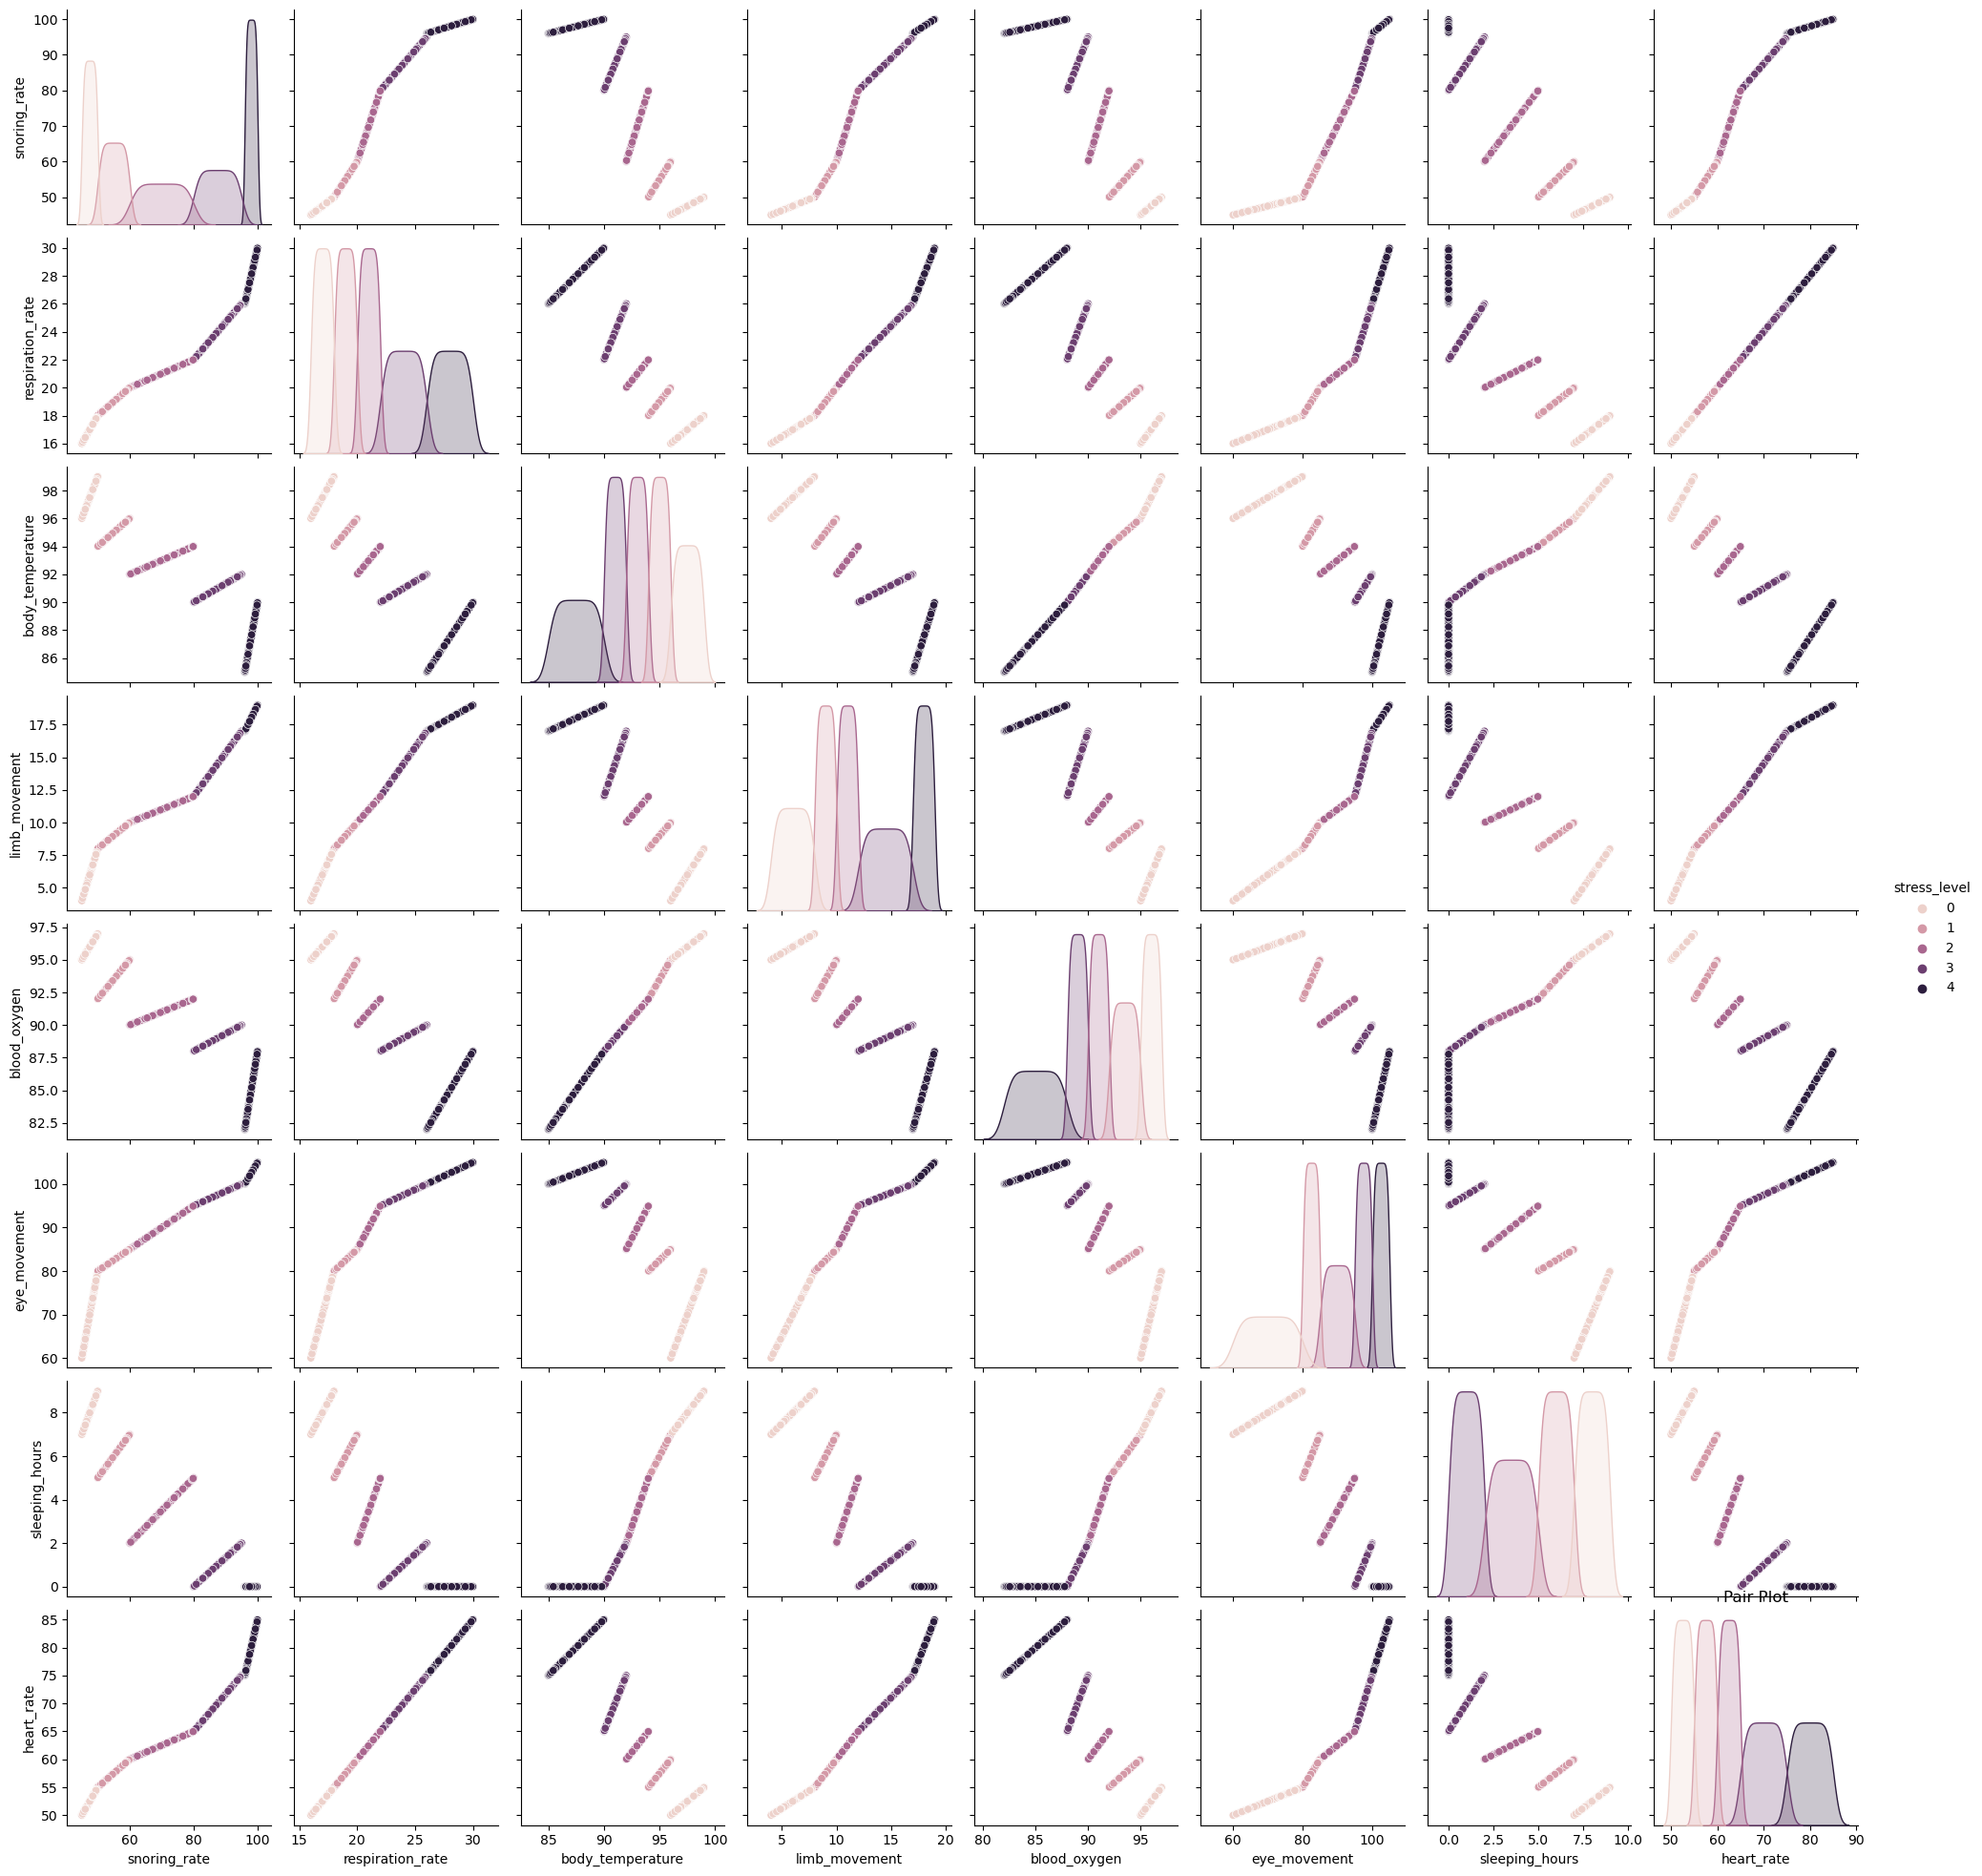

In [16]:
# Creating a pair plot to visualize pairwise relationships between variables, with 'stress_level' as the hue
sns.pairplot(data, hue='stress_level')

# Adding a title to the plot
plt.title('Pair Plot')

# Display the pair plot
plt.show()

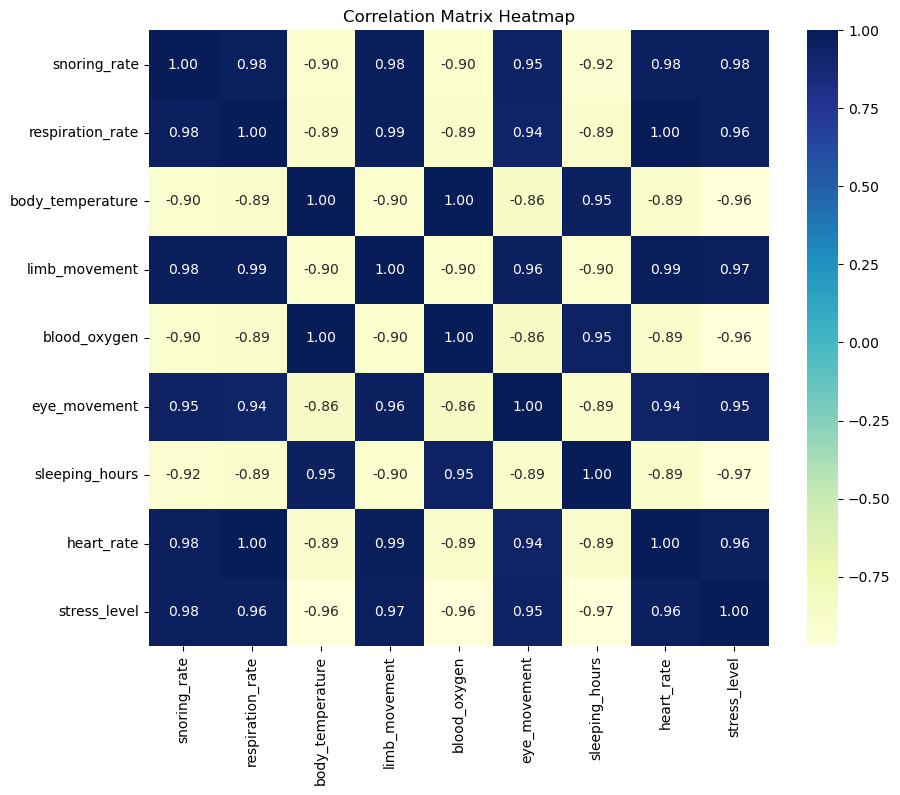

In [17]:
# Correlation Analysis: Correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


.

# Splitting Dataset

In [18]:
# Split the data into features (X) and the target variable (y)

X = data.drop(['stress_level'], axis=1)
y = data['stress_level']

In [19]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [20]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (504, 8)
y_train shape: (504,)
X_test shape: (126, 8)
y_test shape: (126,)


.


## Identifying Important features

In [21]:
# Create an instance of the RandomForestClassifier with hyperparameters
forest = RandomForestClassifier(n_estimators=500, random_state=1)

# Train the RandomForestClassifier on the training data
forest.fit(X_train, y_train.values.ravel())

RandomForestClassifier(n_estimators=500, random_state=1)

In [22]:
# Get the feature importances from the trained RandomForestClassifier
importances = forest.feature_importances_

# Loop over each feature and its importance
for i in range(X_train.shape[1]):
    # Print the feature number, name, and importance score
    print("%2d) %-*s %f" % (i + 1, 30, data.columns[i], importances[i]))

 1) snoring_rate                   0.130143
 2) respiration_rate               0.123295
 3) body_temperature               0.122216
 4) limb_movement                  0.123938
 5) blood_oxygen                   0.136199
 6) eye_movement                   0.137116
 7) sleeping_hours                 0.104807
 8) heart_rate                     0.122288


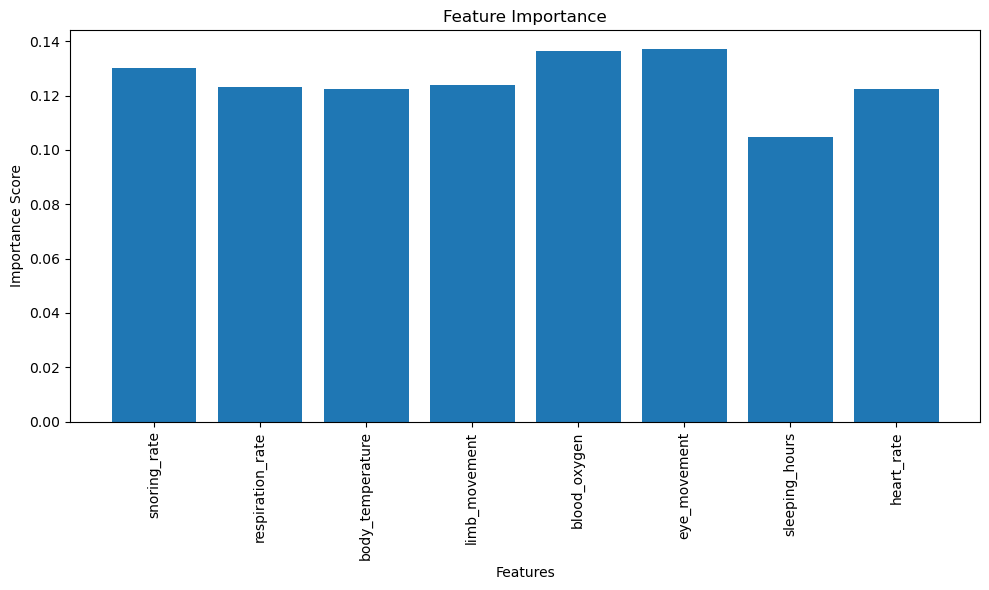

In [23]:
# Plotting the feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.title('Feature Importance')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

### Inference:
The model considers 'eye_movement' and 'blood_oxygen' as the most critical features for stress level prediction during sleep. High values of these features may indicate higher stress levels.

'snoring_rate', 'limb_movement', and 'heart_rate' also have notable importance, indicating their relevance to stress prediction.

On the other hand, 'sleeping_hours' seems to be the least influential feature according to this model, although it is still essential to consider it in the analysis.



.

## MODEL TRAINING





### 1. Logistic Regression Classifier

In [24]:
# Creating a logistic regression classifier object with specified parameters
# using the LogisticRegression class from scikit-learn
log_reg = LogisticRegression(max_iter=1000, C=0.001)

log_reg.fit(X_train, y_train)

LogisticRegression(C=0.001, max_iter=1000)

In [25]:
# Training accuracy
train_acc = log_reg.score(X_train, y_train)
    
# Testing accuracy
test_acc = log_reg.score(X_test, y_test)
print('Training Accuracy:',train_acc)
print('Testing Accuracy:',test_acc)

Training Accuracy: 0.9682539682539683
Testing Accuracy: 0.9761904761904762


In [26]:

y_predict = log_reg.predict(X_test)


matrix = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")    
print(matrix)

Confusion Matrix:
[[22  1  0  0  0]
 [ 0 24  0  0  0]
 [ 0  1 26  1  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 25]]


Class 1 (index 0): TP=22, FP=1, TN=76, FN=0
Class 2 (index 1): TP=24, FP=1, TN=74, FN=0
Class 3 (index 2): TP=26, FP=1, TN=72, FN=0
Class 4 (index 3): TP=26, FP=1, TN=72, FN=0
Class 5 (index 4): TP=25, FP=0, TN=74, FN=0

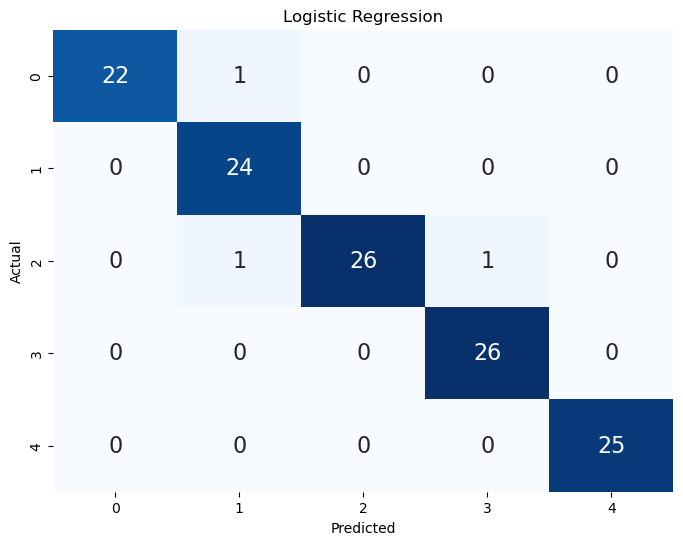

In [27]:
log_reg = LogisticRegression(max_iter=1000, C=0.001)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Logistic Regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [28]:
# To Print the classification report to evaluate the performance of the model
# using the classification_report() function from scikit-learn
# The true labels (y_test) and predicted labels (y_predict) are provided as the parameters
report = classification_report(y_test, y_predict)

# Print the classification report
print("Classification Report:")      
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.92      1.00      0.96        24
           2       1.00      0.93      0.96        28
           3       0.96      1.00      0.98        26
           4       1.00      1.00      1.00        25

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126



### 2. Decision Tee Classifier

In [29]:
decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)

In [30]:
# Training accuracy
train_acc = decision_tree.score(X_train, y_train)
    
# Testing accuracy
test_acc = decision_tree.score(X_test, y_test)
print('Training Accuracy:',train_acc)
print('Testing Accuracy:',test_acc)

Training Accuracy: 1.0
Testing Accuracy: 0.9761904761904762


In [31]:
y_predict = decision_tree.predict(X_test)

matrix = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[23  0  0  0  0]
 [ 1 22  1  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 25  1]
 [ 0  0  0  0 25]]


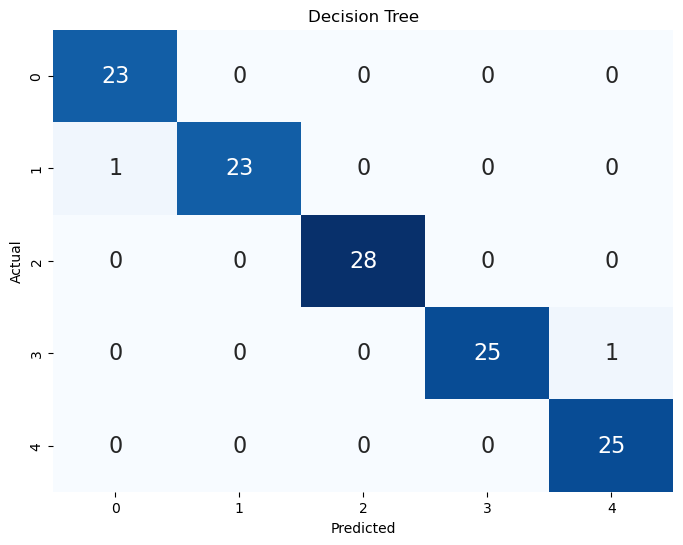

In [32]:
decision_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Decision Tree')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [33]:
report = classification_report(y_test, y_predict)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.92      0.96        24
           2       0.97      1.00      0.98        28
           3       1.00      0.96      0.98        26
           4       0.96      1.00      0.98        25

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126



### 3. Random Forest Classifier

In [34]:
random_forest = RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_split=5, random_state=1)
random_forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=500,
                       random_state=1)

In [35]:
# Training accuracy
train_acc = random_forest.score(X_train, y_train)
    
# Testing accuracy
test_acc = random_forest.score(X_test, y_test)
print('Training Accuracy:',train_acc)
print('Testing Accuracy:',test_acc)

Training Accuracy: 1.0
Testing Accuracy: 0.9841269841269841


In [36]:
y_predict = random_forest.predict(X_test)

matrix = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[23  0  0  0  0]
 [ 1 23  0  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 25  1]
 [ 0  0  0  0 25]]


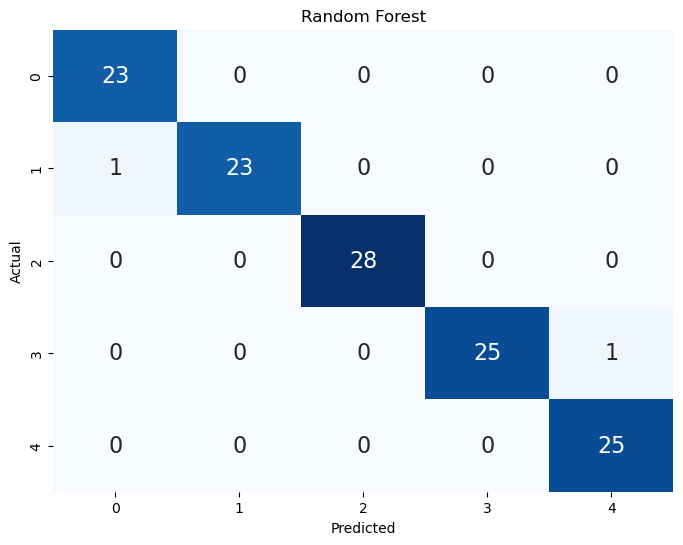

In [37]:
random_forest = RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_split=5, random_state=1)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Random Forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [38]:
report = classification_report(y_test, y_predict)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.96      0.98        24
           2       1.00      1.00      1.00        28
           3       1.00      0.96      0.98        26
           4       0.96      1.00      0.98        25

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126



### 4. SVM Classifier

In [39]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [40]:
# Training accuracy
train_acc = svm.score(X_train, y_train)
    
# Testing accuracy
test_acc = svm.score(X_test, y_test)
print('Training Accuracy:',train_acc)
print('Testing Accuracy:',test_acc)

Training Accuracy: 0.9900793650793651
Testing Accuracy: 0.9841269841269841


In [41]:
y_predict = svm.predict(X_test)

matrix = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")
print(matrix)

Confusion Matrix:
[[22  1  0  0  0]
 [ 0 24  0  0  0]
 [ 0  1 27  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 25]]


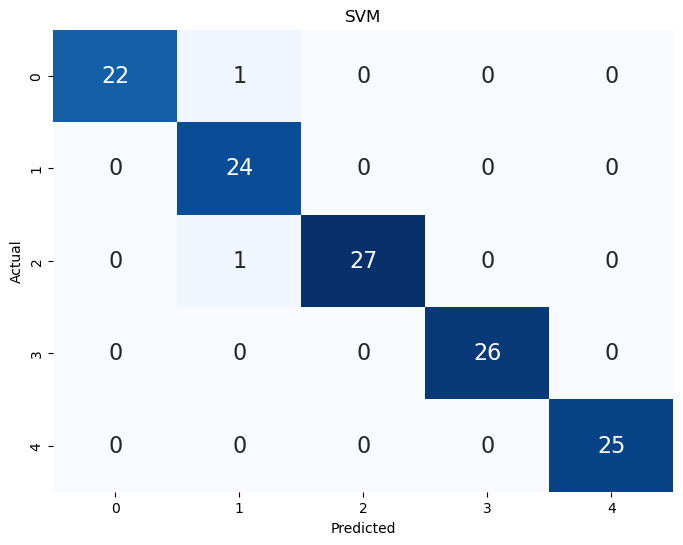

In [42]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('SVM')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [43]:
report = classification_report(y_test, y_predict)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.92      1.00      0.96        24
           2       1.00      0.96      0.98        28
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.99      0.98      0.98       126



### 5. Gradient Boosting
### 6.Bagging
### 7.XGBoost

In [44]:
classifiers = {
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, max_depth=3, min_samples_split=5, random_state=1),   
    "Bagging": BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, random_state=42),
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)
    
    # Training accuracy
    train_acc = clf.score(X_train, y_train)
    
    # Testing accuracy
    test_acc = clf.score(X_test, y_test)
    
    # Predictions
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    # Confusion matrix
    cm_test = confusion_matrix(y_test, y_pred_test)
    
    # Classification report
    cr_test = classification_report(y_test, y_pred_test)
    
    # Print accuracy
    print(f"{name} Training Accuracy: {train_acc:.4f}, Testing Accuracy: {test_acc:.4f}")
    
    # Print confusion matrix
    print(f"{name} Testing Confusion Matrix:")
    print(cm_test)
    
    # Print classification report
    print(f"{name} Testing Classification Report:")
    print(cr_test)

Gradient Boosting Training Accuracy: 1.0000, Testing Accuracy: 0.9762
Gradient Boosting Testing Confusion Matrix:
[[23  0  0  0  0]
 [ 1 22  1  0  0]
 [ 0  0 28  0  0]
 [ 0  0  1 25  0]
 [ 0  0  0  0 25]]
Gradient Boosting Testing Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.92      0.96        24
           2       0.93      1.00      0.97        28
           3       1.00      0.96      0.98        26
           4       1.00      1.00      1.00        25

    accuracy                           0.98       126
   macro avg       0.98      0.98      0.98       126
weighted avg       0.98      0.98      0.98       126

Bagging Training Accuracy: 1.0000, Testing Accuracy: 0.9762
Bagging Testing Confusion Matrix:
[[23  0  0  0  0]
 [ 2 22  0  0  0]
 [ 0  0 28  0  0]
 [ 0  0  0 25  1]
 [ 0  0  0  0 25]]
Bagging Testing Classification Report:
              precision    recall

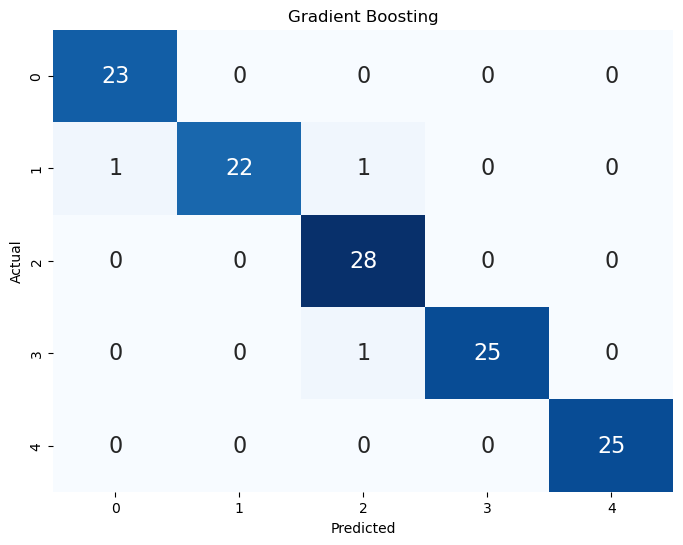

In [45]:
grad_boost = GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, max_depth=3, min_samples_split=5, random_state=1)
grad_boost.fit(X_train, y_train)
y_pred = grad_boost.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Gradient Boosting')-
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

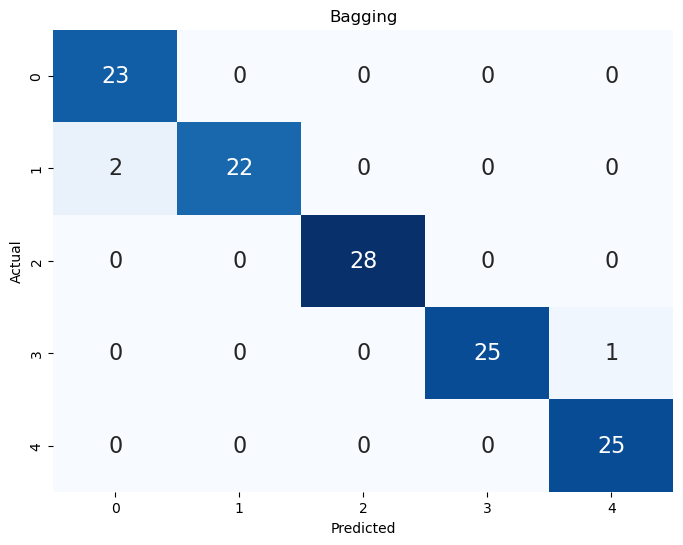

In [46]:
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Bagging')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

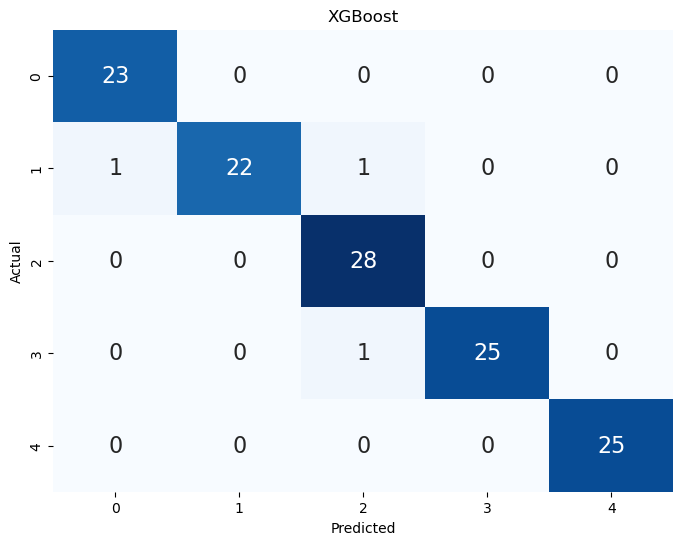

In [47]:
xgboost = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('XGBoost')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Accuracy of Logistic Regression: 0.9762
Accuracy of Decision Tree: 0.9762
Accuracy of Random Forest: 0.9841
Accuracy of SVM: 0.9841
Accuracy of KNN: 1.0000
Accuracy of Gaussian Naive Bayes: 1.0000
Accuracy of Gradient Boosting: 0.9762
Accuracy of Bagging: 0.9762
Accuracy of XGBoost: 0.9762


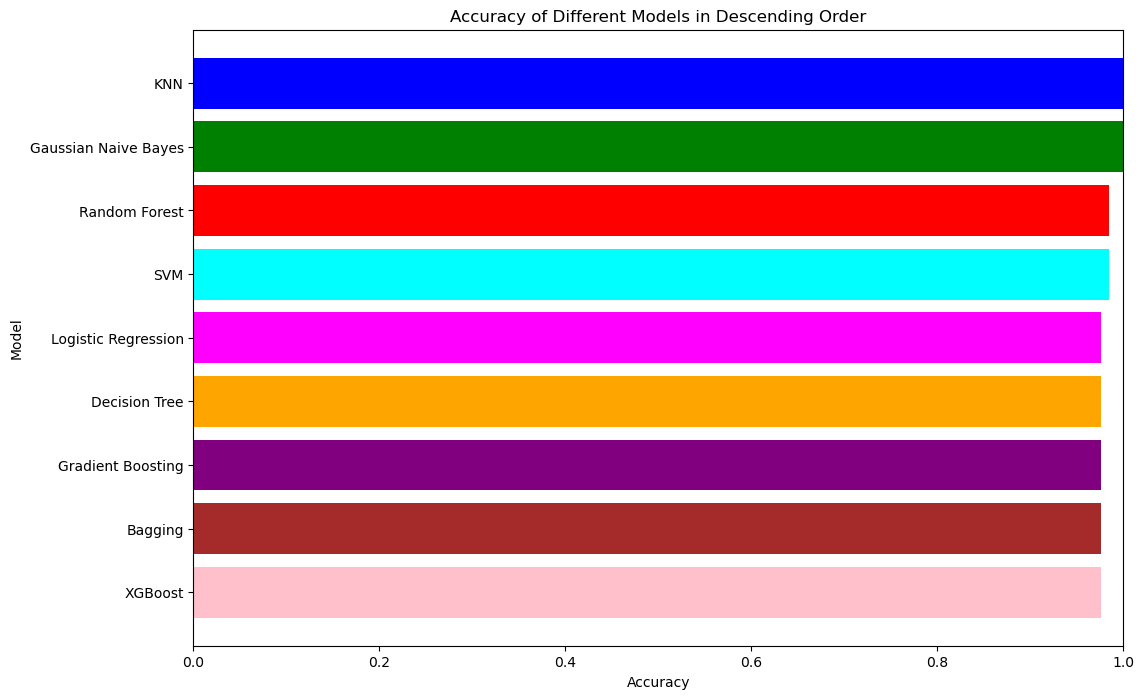

In [71]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

# Assuming X_train, y_train, X_test, and y_test are already defined

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, C=0.001),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5),
    "Random Forest": RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_split=5, random_state=1),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=500, learning_rate=0.01, max_depth=3, min_samples_split=5, random_state=1),
    "Bagging": BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=100, random_state=42),
}

# Dictionary to store accuracy of each model
accuracy_scores = {}

# Training and evaluating each model
for name, model in models.items():
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    accuracy_scores[name] = accuracy

    # Print the accuracy
    print(f"Accuracy of {name}: {accuracy:.4f}")

# Sort the accuracy scores in descending order
sorted_accuracy_scores = dict(sorted(accuracy_scores.items(), key=lambda item: item[1], reverse=True))

model_names = list(sorted_accuracy_scores.keys())
accuracies = list(sorted_accuracy_scores.values())

# Plot the sorted accuracy scores
plt.figure(figsize=(12, 8))
plt.barh(model_names, accuracies, color=['blue', 'green', 'red', 'cyan', 'magenta', 'orange', 'purple', 'brown', 'pink'])
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy of Different Models in Descending Order')
plt.xlim([0, 1])
plt.gca().invert_yaxis()  # Invert y-axis to show the highest accuracy at the top
plt.show()


#### The Logistic Regression model seems to be more stable and less prone to overfitting compared to the ensemble methods.

.

## STRESS PREDICTION


### Using Logistic Regression

In [68]:
# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, C=0.001)
log_reg.fit(X_train, y_train)

# Function to get user input for each feature
def get_user_input():
    features = ["snoring_rate", "respiration_rate", "body_temperature", "limb_movement",
                "blood_oxygen", "eye_movement", "sleeping_hours", "heart_rate"]
    user_data = []
    
    for feature in features:
        value = float(input(f"Enter the value for {feature.replace('_', ' ')}: "))
        user_data.append(value)
    
    return pd.DataFrame([user_data], columns=features)

# Get user input
new_data = get_user_input()

# Predict the stress level for the new data
predicted_stress_level = log_reg.predict(new_data)

# Dictionary to map integer stress levels to human-readable labels
stress_level_labels = {
    0: "Low/Normal",
    1: "Medium Low",
    2: "Medium",
    3: "Medium High",
    4: "High"
}

# Get the human-readable label for the predicted stress level
predicted_stress_label = stress_level_labels[predicted_stress_level[0]]

# Display the human-readable label for the predicted stress level
print("Predicted Stress Label:", predicted_stress_level[0], "(", predicted_stress_label, ")")


Enter the value for snoring rate: 90
Enter the value for respiration rate: 23
Enter the value for body temperature: 92
Enter the value for limb movement: 15
Enter the value for blood oxygen: 90
Enter the value for eye movement: 95
Enter the value for sleeping hours: 2
Enter the value for heart rate: 70
Predicted Stress Label: 3 ( Medium High )
